<a href="https://colab.research.google.com/github/Sabermahjoub/BOOK-STORE/blob/main/Python_DataScience_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a Python Script that manipulates CSV files, generates a report, and plots some graphics.

In [32]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


In [2]:
#upload the file from the local machine :
from google.colab import files
uploaded = files.upload()

with open("Sales_file.csv",'r') as file:
  print("Opening CSV file test is successfull ! ")

Saving Sales_file.csv to Sales_file.csv
ok


In [3]:
#dateparse = lambda x : datetime.strptime(x,'%Y/%m/%d')

df = pd.read_csv('Sales_file.csv',parse_dates=['date'])

print(df)

        country       region       date product  unit_price  profit
0       Tunisia       Ariana 2023-08-01    Rice          12    3000
1           USA   California 2022-07-15   Wheat          15    4500
2        Brazil    Sao Paulo 2023-09-05  Coffee          10    2500
3         China      Beijing 2023-06-21     Tea           8    2000
4         India       Mumbai 2023-04-30   Sugar           5    1500
..          ...          ...        ...     ...         ...     ...
97   Mozambique        Beira 2023-08-28    Milk           7    1600
98        Gabon  Port-Gentil 2021-09-08   Bread           3    1000
99      Namibia   Swakopmund 2022-10-27    Rice          10    2600
100    Botswana  Francistown 2023-11-03   Wheat          14    3800
101      Malawi     Blantyre 2022-12-24     Tea           7    1700

[102 rows x 6 columns]


In [4]:
#Sum of all profits

total_profit = df['profit'].sum()

print("Total profit : {} $ \n".format(total_profit))

print("Profits per year : \n")
df['year']=df['date'].dt.year

total_profits_by_year = df.groupby('year')['profit'].sum().reset_index()

total_profits_by_year.columns = ['year', 'total profit per year']

print(total_profits_by_year,'\n')

print("Profits per country : \n")

total_profits_by_country = df.groupby('country')['profit'].sum()

print(total_profits_by_country,'\n')

Total profit : 208000 $ 

Profits per year : 

   year  total profit per year
0  2021                  22300
1  2022                  46100
2  2023                 139600 

Profits per country : 

country
Algeria         2800
Angola          3700
Argentina       4000
Australia       4900
Bangladesh      3700
Botswana        6400
Brazil          5000
Burundi         2400
Cameroon        2900
Canada          2000
China           3500
Djibouti         800
Egypt           3600
Ethiopia        2500
France          2600
Gabon           2600
Germany         3800
Ghana           4000
India           2600
Indonesia       5700
Italy           4000
Ivory Coast     3900
Japan           6100
Kenya           5300
Libya           2900
Madagascar      2100
Malawi          5500
Malaysia        3400
Mauritius       1300
Mexico          3500
Morocco         3800
Mozambique      3800
Namibia         3600
Nigeria         6400
Pakistan        2700
Philippines     3900
Russia          5200
Rwanda          17

{1: [19400, 900, 4000, '9.33'], 2: [18700, 1600, 4500, '8.99'], 3: [12000, 800, 2000, '5.77'], 4: [19600, 1300, 2900, '9.42'], 5: [19500, 1400, 3800, '9.38'], 6: [12700, 900, 2000, '6.11'], 7: [22400, 1600, 4500, '10.77'], 8: [20900, 1500, 4000, '10.05'], 9: [11300, 800, 2500, '5.43'], 10: [18400, 1300, 2900, '8.85'], 11: [20300, 1400, 3800, '9.76'], 12: [12800, 800, 2800, '6.15']}


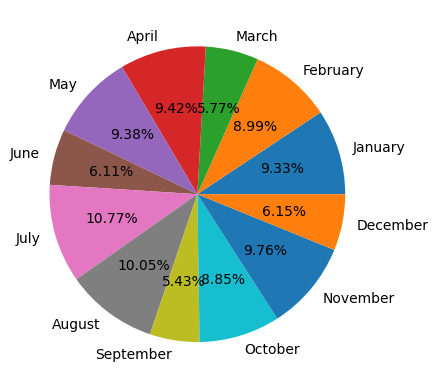

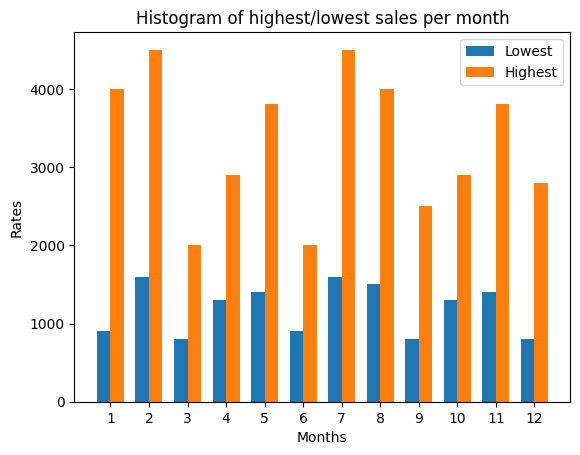

Average Sales per month is 17333.33


In [38]:
#grouping by all months of the year
#determining the highest and lowest sales per month

months = {
    1 : "January", 2 : "February" , 3 : "March", 4 : "April" , 5 : "May", 6 : "June", 7 : "July" , 8 : "August", 9 : "September" , 10 : "October",
    11: "November", 12 : "December"
}

dict_sales_month = {
}
average_sales=0
lowest_highest = []

df['month']=df['date'].dt.month
top_sales_per_month = df.groupby('month')['profit'].max()
worst_sales_per_month = df.groupby('month')['profit'].min()

#Convert into dictionary to be able to use the values later
top_sales_per_month_dict = top_sales_per_month.to_dict()
worst_sales_per_month_dict = worst_sales_per_month.to_dict()

try :
  all_months_list = df['month'].tolist()
  all_months_list=list(dict.fromkeys(all_months_list))
  all_months_list.sort()
  #print(all_months_list)
except(e):
  print("** Conversion to list error ! **")
  print(e)

for i in all_months_list:
  df['month']=df['date'].dt.month
  month_df = df[df['month'] == i]
  total_profits_by_month = month_df['profit'].sum()
  average_sales += total_profits_by_month
  dict_sales_month[i] = [total_profits_by_month,worst_sales_per_month_dict[i],top_sales_per_month_dict[i],'{:.2f}'.format(total_profits_by_month * 100 / total_profit)]
  #print(months[i]," :",total_profits_by_month,'\t {:.2f}% of all profits \t average sales : \n'.format(total_profits_by_month*100/total_profit))
  #print("\t (-)Lowest : {} \t (+)Highest : {} \n".format(worst_sales_per_month_dict[i],top_sales_per_month_dict[i]))
print(dict_sales_month)

#Plot the of pie chart for percent
y = list(map(lambda month: dict_sales_month[month][0] / len(all_months_list), all_months_list))
mylabels = list(map(lambda month: months[month], all_months_list))
plt.pie(y, labels = mylabels,autopct=lambda p: '{:.2f}%'.format(p))
plt.show()

#Plotting of the histogram of the highest / lowest sales per month
ind = np.arange(len(all_months_list))
fig, ax = plt.subplots()
rects1 = ax.bar(ind, [val[1] for val in list(worst_sales_per_month_dict.items())], 0.35, label='Lowest')
rects1 = ax.bar(ind + 0.35, [val[1] for val in list(top_sales_per_month_dict.items())], 0.35, label='Highest')

ax.set_xlabel('Months')
ax.set_ylabel('Rates')
ax.set_title('Histogram of highest/lowest sales per month')
ax.set_xticks(ind + 0.35 / 2)
ax.set_xticklabels(all_months_list)
ax.legend()

plt.show()

#Average Sales
print("Average Sales per month is {:.2f}".format(average_sales/len(all_months_list)))

Top Sold Products 

Wheat  : 	 44600 $
Rice  : 	 33300 $
Coffee  : 	 26200 $


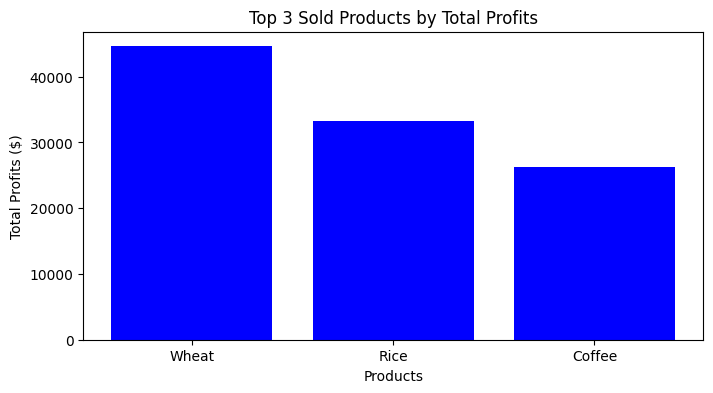

In [23]:
print("Top Sold Products \n")

total_profits_by_product = df.groupby('product')['profit'].sum()

try :
  total_profits_by_product_dict=total_profits_by_product.to_dict()
except(e):
  print("** Conversion to dict error ! **")
  print(e)
total_profits_by_product_dict = dict(sorted(total_profits_by_product_dict.items(), key=lambda item: item[1], reverse=True))

iterator = iter(total_profits_by_product_dict.items())

products = []
profits = []
for i in range(3):
  t = next(iterator)
  products.append(t[0])
  profits.append(t[1])
  print(t[0], " : \t",t[1],"$")

plt.figure(figsize=(8, 4))
plt.bar(products, profits, color='blue')
plt.xlabel('Products')
plt.ylabel('Total Profits ($)')
plt.title('Top 3 Sold Products by Total Profits')
plt.show()
